# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)







\begin{equation}
A = As - 2\frac{(r\cos\theta/2 )(r\sin\theta/2)}{2} 
\end{equation}


.

.

.




\begin{equation}
\theta-\sin \theta = \frac{\pi}{2}
\end{equation}



\begin{equation}
f(\theta)= \theta- \sin \theta - \frac{\pi}{2}=0
\end{equation}



In [594]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy as sp
from scipy import optimize

resultado con bisect es 2.309881460010729. Ademas este tambien es el angulo 
El resultado con Newton 2.309881460010057


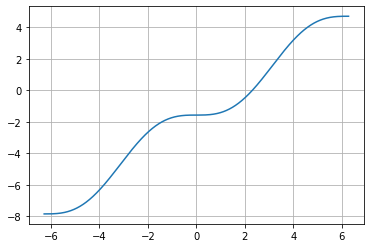

In [595]:
def f(theta): 
  return theta-np.sin(theta)-np.pi/2 #funcion trascendental igual a cero la real es theta-np.sin(theta) = np.pi/2, puntos a) y b)

df = pd.DataFrame({"theta":np.linspace(-2*np.pi,2*np.pi,1000)}) # la parte c), el dataframe 

df["f(theta)"] = f(np.linspace(-2*np.pi,2*np.pi,1000)) # parte de la d)

plt.plot(df["theta"],df["f(theta)"]) #parte f)
plt.grid()

print(f"resultado con bisect es {optimize.bisect(f,0,4)}. Ademas este tambien es el angulo ")
#La funcion bisect recibe como parametro: una funcion a la cual se le quiere encontrar las raices, un x0 = 0, en este caso, y un xn = 4 en este caso. 
# x0 y xn deben tener signos contrarios

print(f"El resultado con Newton {optimize.newton(f,0)}")
#La funcion newton recibe como parametro: una funcion a la cual se le quiere encontrar las raices y un x0 = 0, en este caso




# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [596]:
# Parametros iniciales
v0 = 60 #Velocidad del proyectil en m/s
alpha = np.pi #Angulo del viento, va en sentido contrario de donde se lanza el proyectil 
theta = np.deg2rad(45) #Angulo de lanzamiento del proyectil
b = 0.05             #Parametro de friccion 
u = v0/2             #Rapidez del viento
g = 9.8              #Aceleracion de la gravedad m/(s^2)
Params = (alpha, v0, b, u, g)  #Parametros en tupla.

In [597]:
#Posicion en x
def pos_x(t, theta, alpha, v0, b, u, g):
  T1 = u * t * np.cos(alpha) #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t)) #Termino 3

  return T1 + T2*T3  # Ecuacion de la posicion de X

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u, g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3

  return T1* T2 - T3 # Ecuacion de la posicion de Y


In [598]:
t = np.linspace(0, 20, 100) #Tiempo entre 0 y 20 con 100 puntos 
x = pos_x(t, theta, *Params) #x es un array de las posiciones que toma el proyectil a lo largo del tiempo t
y = pos_y(t, theta, *Params) #y es un array de las posiciones que toma el proyectil a lo largo del tiempo t
pos = { "X": x , "Y": y, "Tiempo": t } #Diccionario para crear el dataframe
df = pd.DataFrame.from_dict(pos) # creacion del dataframe 

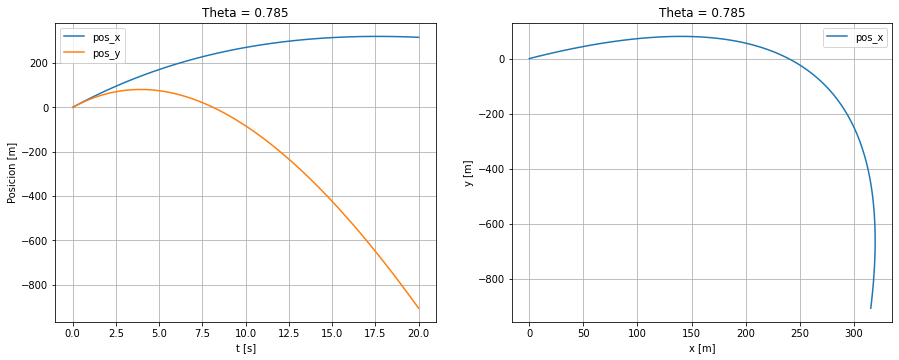

In [599]:
#Creacion de la figura de las posiciones X, y Y respecto al tiempo 
plt.figure(figsize=(15,5.5))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label="pos_x") 
plt.plot(df["Tiempo"], df["Y"], label="pos_y")
plt.xlabel("t [s]")
plt.ylabel("Posicion [m]")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()

#Creacion de la figura con la trayectoria del proyectil 
plt.subplot(122)
plt.plot(df["X"], df["Y"], label="pos_x") 
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()
plt.show()

El tiempo que se demora en llegar de nuevo a y = 0 es 8.11162702209557


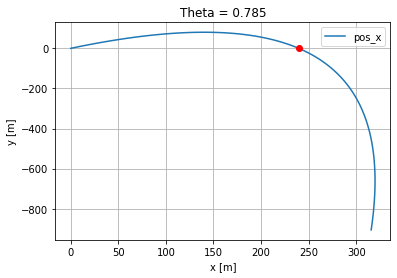

In [600]:
#En esta celda encontramos t con newton normal.
tupla = theta, alpha, v0, b, u, g
print(f"El tiempo que se demora en llegar de nuevo a y = 0 es {optimize.newton(pos_y, 10, args = tupla )}")
plt.plot(df["X"], df["Y"], label="pos_x") 
plt.plot(pos_x(8.11162702209557,*(tupla)),pos_y(8.11162702209557,*(tupla)),"ro")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()

In [601]:
#Ahora reemplzando el tiempo t_prima = 8.11162702209557 en la posicion de x, y para un angulo θ=45°
t_prima = 8.11162702209557
print(pos_x(t_prima, theta, alpha, v0, b, u, g))

239.60614945520706


In [602]:
theta = np.linspace(10, 90, 17) # 10 <= theta <= 90
array = np.zeros(len(theta)) # este array son los tiempos que se demora y = 0 para cada θ entre 10 y 90  
tupla_1 = alpha, v0, b, u, g
j = 0
for i in theta:
  raiz = optimize.newton(pos_y, 10, args = (np.deg2rad(i), *tupla_1))
  array[j] = raiz
  j += 1 
print(array)

array_1 = np.zeros(len(theta)) # este array tiene las posiciones del x, para cada θ
for i in range(0, len(theta)):
  R = pos_x(array[i], np.deg2rad(theta[i]), *tupla_1) 
  array_1[i] = R
print(array_1)

[ 2.08991303  3.08969274  4.05131868  4.96934254  5.83875914  6.65499011
  7.41386887  8.11162702  8.74488266  9.31063044  9.80623346 10.22941677
 10.5782623  10.85120507 11.04703035 11.16487174 11.20420989]
[114.09205021 159.11424792 195.25160684 222.1925717  239.86601038
 248.41385426 248.16428008 239.60614946 223.36511298 200.18155773
 170.89041443 136.40273087  97.68884772  55.76297185  11.66892048
 -33.53319794 -78.7796008 ]


In [603]:
# Creamos el diccionario y luego el dataframe a partir del diccionario, y a partir del diccionario creamos el plot 
dicc = {"R" : array_1, "theta" : theta}
df1 = pd.DataFrame.from_dict(dicc) 
df1

,R,theta
0,114.092050,10.0
1,159.114248,15.0
2,195.251607,20.0
3,222.192572,25.0
4,239.866010,30.0
5,248.413854,35.0
6,248.164280,40.0
7,239.606149,45.0
8,223.365113,50.0
9,200.181558,55.0


No handles with labels found to put in legend.


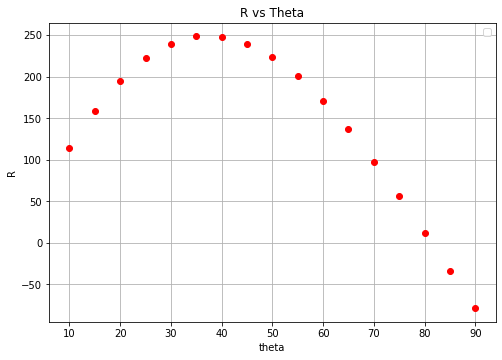

In [604]:
# crear la grafica del punto 5
plt.figure(figsize=(8,5.5))
plt.plot(df1["theta"], df1["R"], "ro") 
plt.xlabel("theta")
plt.ylabel("R")
plt.legend()
plt.title("R vs Theta")
plt.grid()

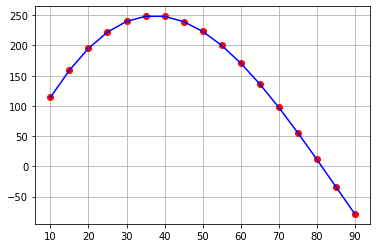

In [605]:
#Realizamos la interpolacion y mostramos la grafica
f=sp.interpolate.interp1d(df1["theta"],df1["R"]) # Interpolacion a partir del df1
plt.plot(df1["theta"], df1["R"], "ro")
plt.plot(df1["theta"],f(df1["theta"]),"b-")
plt.grid()